In [5]:
# 数据处理库
import pandas as pd
import numpy as np
import sys
sys.path.append("..")

In [6]:
fn = '02OMB_Chla.xlsx'
df = pd.read_excel(fn)
df_new = df[['date','chl','改进chl','chl/a-in-situ']]
df_new = df_new.rename(columns={'改进chl':'chl_improve','chl/a-in-situ':'chla_insitu'})
df_new['datetime'] = pd.to_datetime(df_new['date'],"%Y-%m-%d")
df_new = df_new.drop(['date'],axis=1)
df_new = df_new.set_index(['datetime'])

df_new['chl-insitu'] = df_new['chl']-df_new['chla_insitu']
df_new['chli-insitu']= df_new['chl_improve']-df_new['chla_insitu']

Group = df_new.groupby(pd.Grouper(freq='m'))
df_new_mean = Group.mean()
df_new_std = Group.std()

In [7]:
df_new.describe()

chl  chl_improve  chla_insitu  chl-insitu  chli-insitu
count  59.000000    59.000000    59.000000   59.000000    59.000000
mean    0.351244     0.323772     0.413059   -0.061815    -0.089288
std     0.261636     0.218951     0.294574    0.289048     0.204488
min     0.084000     0.085873     0.061539   -0.682672    -0.647188
25%     0.175106     0.201156     0.179021   -0.257139    -0.172809
50%     0.252000     0.257318     0.333193   -0.064569    -0.057026
75%     0.426000     0.357055     0.582717    0.141738     0.050295
max     1.304660     1.095888     1.190920    0.478847     0.192505

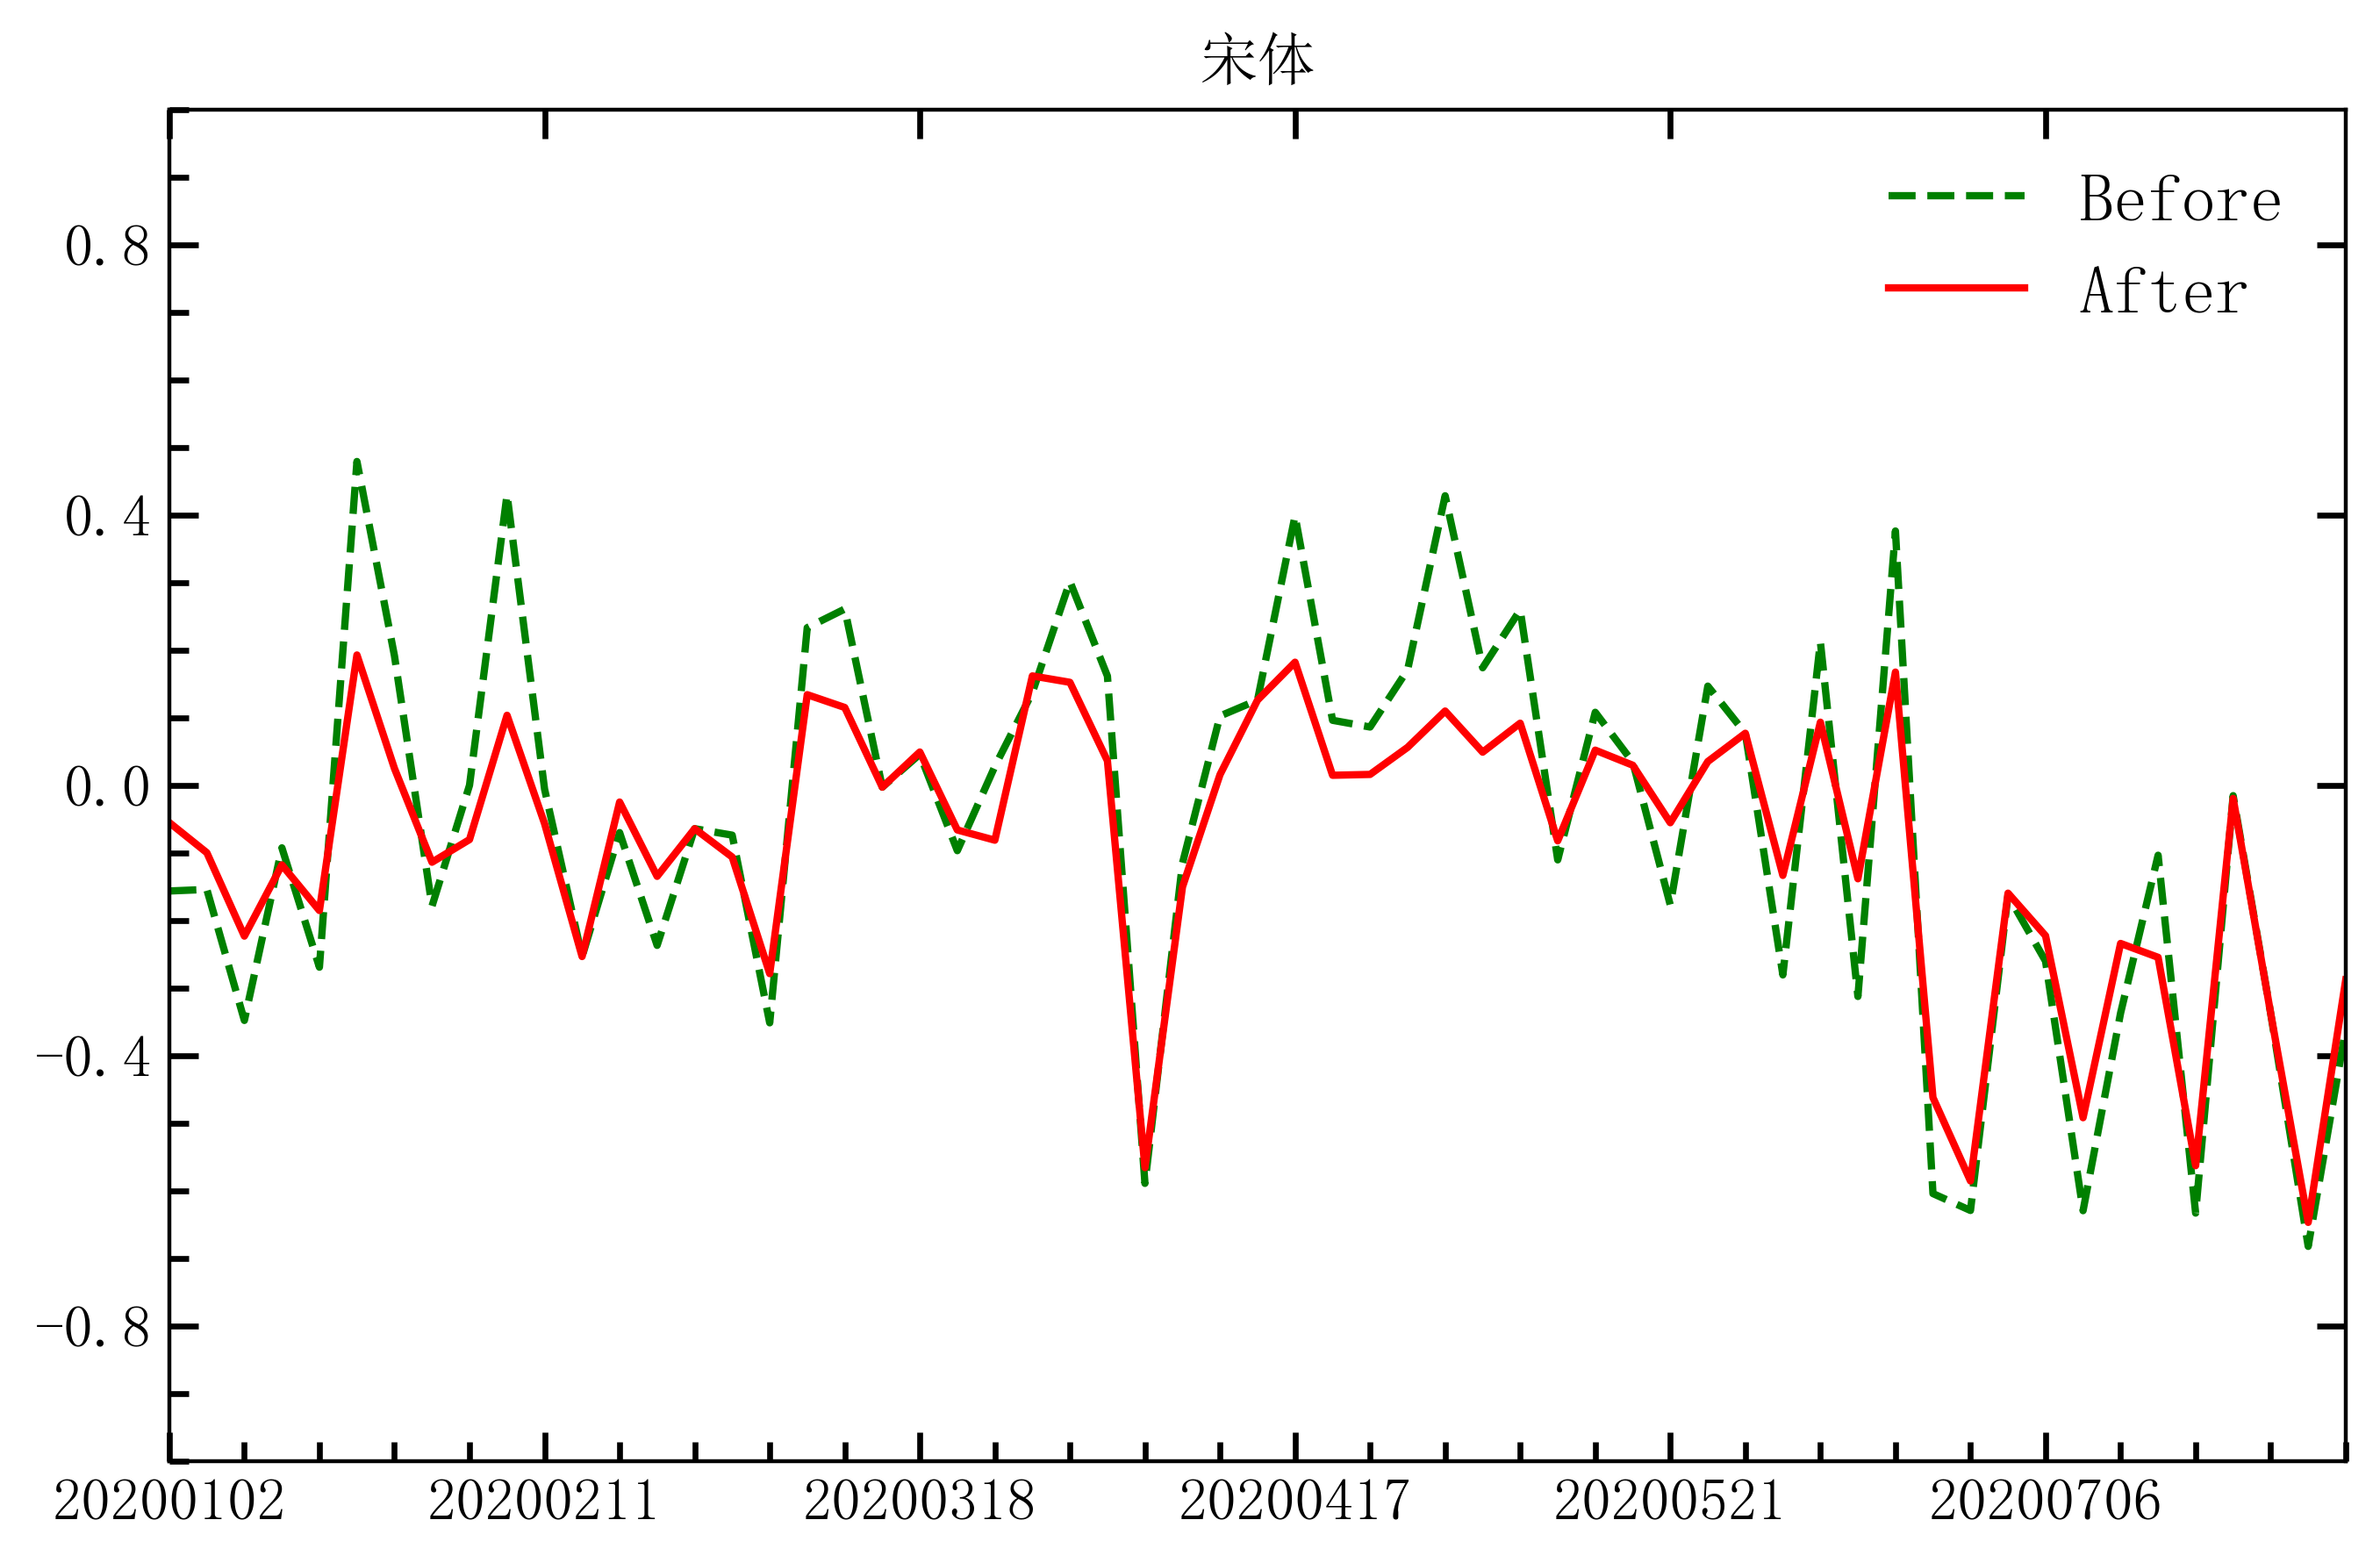

In [8]:
import draw_common
import matplotlib.pyplot as plt

# 时间序列
time = df_new.index.values
x = np.arange(time.shape[0])
positions = x[::10]
labels = [i.strftime('%Y%m%d') for i in pd.to_datetime(time,format='%Y%m%d')][0::10]

fig = draw_common.create_fig()
axs = draw_common.create_plot_datetime(fig,labels,positions)
# 画折线
data = df_new['chl-insitu'].values
axs.plot(x,data,color='g',label='Before',ls='--')

data = df_new['chli-insitu'].values
axs.plot(x,data,color='r',label='After',ls='-')

plt.legend(fontsize=14,shadow=False, fancybox=False,edgecolor='w')
plt.show()